In [1]:
import sys
import numpy as np

sys.path.insert(0, "..")

# Agents
from src.agents.robust_lin_exp3 import RobustLinExp3Agent

# Adversaries
from src.adversaries.adversary import Adversary
from src.adversaries.linear_contextual_adversary import ContextualLinearAdversary

# Contexts
from src.contexts.context import Context
from src.contexts.gaussian_context import GaussianContext

# Environments
from src.environments.environment import Environment
from src.environments.adversarial_contextual_env import AdversarialContextualEnv

# Adversarial Contextual MAB bandits
from src.adversarial_contextual_mab import AdversarialContextualMAB

# Display
from src.display.visualization import Visualization as vis

In [5]:
# Init Vars
K = 10
h = 10000
epsilon = 0.0

# Init Context
num_ctx = 5
d = 3
ctx = GaussianContext(n_contexts=num_ctx, n_features=d, var=0.1)

# Init Agent
name = "RobustLinExp3"
lr = h**(-2/3)*(K*d)**(-1/3)*np.log(K)**(2/3)
exploration_rate = h**(-1/3)*(K*d*np.log(K))**(1/3)
sigma = ctx.estimate_sigma(n_samples=10000)
ag = RobustLinExp3Agent(name=name, K=K, d=d, sigma=sigma, eta=lr, gamma=exploration_rate, epsilon=epsilon) 

# Calculate upper bound
bound_per_timestep = np.array([ag.compute_regret_bound(t) for t in range(h)])

## StochasticLinearAdversary noise experiment

In [6]:
# Init Adversary
noise_mean = epsilon
reset_steps = -1

# Get fixed theta
theta = np.random.randn(K, d)
theta /= np.maximum(np.linalg.norm(theta, axis=1, keepdims=True), 1.0) 

data_labels = []
cumulative_regrets = []
adv = ContextualLinearAdversary(num_actions=K, context_dim=d, horizon=h)
    
# Init Environment
adv_env = AdversarialContextualEnv(adversary=adv, context=ctx)

# Play experiment
num_sim = 100
exp = AdversarialContextualMAB()
_, _, _, _, cumulative_regret, _ = exp.play(agent=ag, environment=adv_env, num_sim=num_sim, horizon=h)

# Append cumulative regret
cumulative_regrets.append(cumulative_regret)
data_labels.append(f"linear increasing vectors")

[[[-2.01772469  1.08446936 -1.57676326]
  [-0.36061214 -0.04572379 -0.80976475]
  [ 0.88046402  0.72581252  0.69174191]
  ...
  [ 0.46134327  0.95377481  1.58071372]
  [-1.47737318 -1.6643062  -0.49958629]
  [-1.6389614  -1.30251872  0.72954973]]

 [[-2.01759546  1.0843999  -1.57666227]
  [-0.36061671 -0.04572437 -0.80977501]
  [ 0.88044196  0.72579433  0.69172457]
  ...
  [ 0.46132138  0.95372955  1.58063871]
  [-1.47729021 -1.66421273 -0.49955824]
  [-1.63887143 -1.30244721  0.72950968]]

 [[-2.01746623  1.08433045 -1.57656128]
  [-0.36062128 -0.04572495 -0.80978526]
  [ 0.88041989  0.72577614  0.69170724]
  ...
  [ 0.46129949  0.95368429  1.5805637 ]
  [-1.47720723 -1.66411926 -0.49953018]
  [-1.63878145 -1.3023757   0.72946963]]

 ...

 [[-0.7258208   0.39010794 -0.56719708]
  [-0.40626425 -0.05151224 -0.91227786]
  [ 0.65988204  0.54397526  0.51844033]
  ...
  [ 0.24248092  0.50130176  0.83081935]
  [-0.6479041  -0.72988384 -0.21909428]
  [-0.73945714 -0.58766287  0.32915404]]

 [

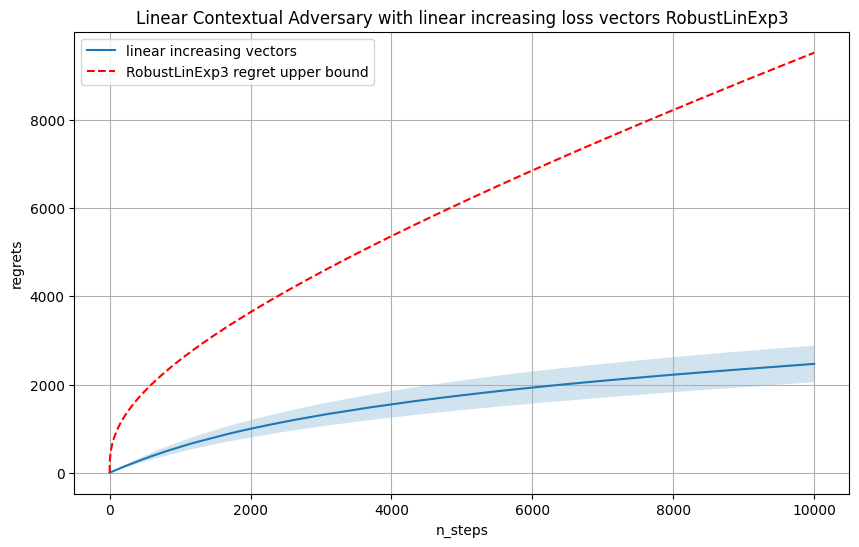

In [7]:
vis.plot_mean_std(
    data=cumulative_regrets, 
    data_labels=data_labels,
    title=f"Linear Contextual Adversary with linear increasing loss vectors {name}",
    xlabel="n_steps", 
    ylabel="regrets", 
    baseline=bound_per_timestep,
    baseline_title=f"{name} regret upper bound"
)